Graphs to make:
- [V] 1. Conversion (CO₂, CH₄ & Total) in function of SEI
- [V] 2. Product yield in function of conversion with selectivity as slope
- [V] 4. CO/H₂ ratio in function of SEI
- [V] 5. Atom balances in function of SEI
- [V] 6. Product selectivity in function of SEI
- [V] 7. Product yield in function of SEI

Step 0: Importing libraries and creating static variables

In [61]:
# Importing the libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.stats as stats

import warnings
#from numpy import RankWarning

# Suppress RankWarnings
#warnings.filterwarnings('ignore', category=RankWarning)

In [62]:
# Define the alpha value for the post-plasma materials
alpha = 0.65

# Define the color for each material_name
cb_colors = {
	'γ-Al₂O₃': (0/255, 0/255, 0/255),
	'2% CuO@γ-Al₂O₃': (86/255, 180/255, 233/255),
	'10% CuO@γ-Al₂O₃': (0/255, 114/255, 178/255),
	'2% Fe₂O₃@γ-Al₂O₃': (230/255, 159/255, 0/255),
	'10% Fe₂O₃@γ-Al₂O₃': (213/255, 94/255, 0/255)
}

# determine order of materials for plotting
material_order = [
	'γ-Al₂O₃',
	'2% CuO@γ-Al₂O₃',
	'2% Fe₂O₃@γ-Al₂O₃',
	'10% CuO@γ-Al₂O₃',
	'10% Fe₂O₃@γ-Al₂O₃'
]

t_quantile = stats.t.ppf(1 - 0.05/2, 7)

In [63]:
# Use Times New Roman font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# Set font size
plt.rcParams['font.size'] = 7

Step 1: Importing & preparing data

In [64]:
# Set the folder and file name
folder_path = r'N:\FWET\FDCH\AdsCatal\General\personal_work_folders\plasmacatdesign\drm\ugent'
file_path = os.path.join(folder_path, 'ugent_drm_reaction_data_combined.parquet')

# Read the file
df = pd.read_parquet(file_path)

In [65]:
# Preparing the data for all plots
df = df[
	(df['res_time_sec'] >= 10) &
	(df['res_time_sec'] <= 80)
].assign(
	compound=lambda x: x['compound'].map(
		{
			'CO2': 'CO₂',
			'H2': 'H₂',
			'CO': 'CO',
			'O2': 'O₂',
			'CH4': 'CH₄',
			'C2H6': 'C₂H₆',
			'C2H4': 'C₂H₄',
			'C2H2': 'C₂H₂',
			'C3H8': 'C₃H₈',
			'CH3OH': 'CH₃OH',
			'C2H5OH': 'C₂H₅OH',
			'CH3OCH3': 'CH₃OCH₃',
			'Total' : 'Total'
		}
	),
	material=lambda x: x['material'].map(
		{
			'SASOL 1.8': 'γ-Al₂O₃',
			'2% Cu(II)(NO3)2 @ SASOL 1.8': '2% CuO@γ-Al₂O₃',
			'10% Cu(II)(NO3)2 @ SASOL 1.8': '10% CuO@γ-Al₂O₃',
			'2% Fe(III)Citrate @ SASOL 1.8': '2% Fe₂O₃@γ-Al₂O₃',
			'10% Fe(III)Citrate @ SASOL 1.8': '10% Fe₂O₃@γ-Al₂O₃'
		}
	),
	sei_ideal_kjmol=lambda x: round(
		number=30/((1-0.4687)*(17.31/x['res_time_sec']))*24.055,
		ndigits=-1
	).astype(int)
).rename(columns={
	'res_time_sec': 'residence_time_s',
	'material': 'material_name'
	}
)

Step 2: Conv vs SEI

In [66]:
file_path = os.path.join(
    folder_path,
    'ugent_drm_reaction_conv_fit.parquet'
)
data_conv = pd.read_parquet(file_path)

# Preparing the data for all plots
data_conv = data_conv.assign(
	compound=lambda x: x['compound'].map(
		{
			'CO2': 'CO₂',
			'CH4': 'CH₄',
			'Total' : 'Total'
		}
	),
	material=lambda x: x['material'].map(
		{
			'SASOL 1.8': 'γ-Al₂O₃',
			'2% Cu(II)(NO3)2 @ SASOL 1.8': '2% CuO@γ-Al₂O₃',
			'10% Cu(II)(NO3)2 @ SASOL 1.8': '10% CuO@γ-Al₂O₃',
			'2% Fe(III)Citrate @ SASOL 1.8': '2% Fe₂O₃@γ-Al₂O₃',
			'10% Fe(III)Citrate @ SASOL 1.8': '10% Fe₂O₃@γ-Al₂O₃'
		}
	),
	sei_ideal_kjmol=lambda x: round(
		number=30/((1-0.4687)*(17.31/x['res_time_sec']))*24.055,
		ndigits=-1
	).astype(int)
).rename(columns={
	'res_time_sec': 'residence_time_s',
	'material': 'material_name'
	}
).assign(
	conv=lambda x: x['conv'] * 100,
	conv_sd=lambda x: x['conv_sd'] * 100,
    conv_fit=lambda x: x['fit_pred'] * 100
).copy()

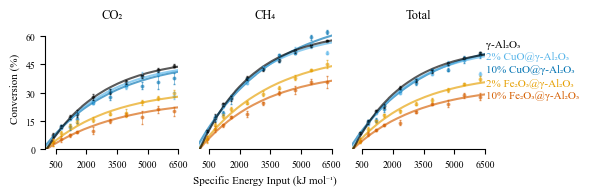

In [67]:
# Create the figure and axes
g = sns.FacetGrid(
	data_conv,
	col='compound',
	col_order=['CO₂', 'CH₄', 'Total'],
	hue='material_name',
	palette=cb_colors,
	height=5/2.54,
	aspect=1,
	col_wrap=3
)

g.map_dataframe(
	sns.scatterplot,
	x='sei_ideal_kjmol',
	y='conv',
	legend=False,
	s=8,
	alpha=alpha
)

g.map_dataframe(
    sns.lineplot,
    x='sei_ideal_kjmol',
    y='conv_fit',
    legend=False,
    alpha=alpha
)

# Get the individual axes
ax1, ax2, ax3 = g.axes.flatten()

# Set titles
ax1.set_title('CO₂', fontsize=9)
ax2.set_title('CH₄', fontsize=9)
ax3.set_title('Total', fontsize=9)

# Set y label
ax1.set_ylabel('Conversion (%)', fontsize=8)

# Set x label for the middle plot
ax1.set_xlabel('')
ax2.set_xlabel('Specific Energy Input (kJ mol⁻¹)', fontsize=8)
ax3.set_xlabel('')

# Set x ticks
ax1.set_xlim(0, 6500)
ax1.spines['bottom'].set_bounds(500, 6500)
ax2.spines['bottom'].set_bounds(500, 6500)
ax3.spines['bottom'].set_bounds(500, 6500)
ax1.set_xticks(ticks=[500, 2000, 3500, 5000, 6500])

# Set y ticks
ax1.set_ylim(0, 65)
ax1.spines['left'].set_bounds(0, 60)
ax1.set_yticks(ticks=[0, 15, 30, 45, 60])

ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.spines['left'].set_visible(False)
ax3.yaxis.set_visible(False)

# Iterate over the axes to add error bars
# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['CO₂', 'CH₄', 'Total']):
	for material_name in data_conv['material_name'].unique():
		subset = data_conv[
			(data_conv['compound'] == compound) &
			(data_conv['material_name'] == material_name)
		]
		ax.errorbar(
			subset['sei_ideal_kjmol'],
			subset['conv'],
			yerr=subset['conv_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)
	
	
# Define the label points manually
label_points = {
	'γ-Al₂O₃': (6500, 54),
	'2% CuO@γ-Al₂O₃': (6500, 47.5),
	'2% Fe₂O₃@γ-Al₂O₃': (6500, 33.5),
	'10% CuO@γ-Al₂O₃': (6500, 41),
	'10% Fe₂O₃@γ-Al₂O₃':  (6500, 27)
}

# Loop through each item in label_points
# and add a text label with an offset
for material_name, (x, y) in label_points.items():
	ax3.annotate(
		text=material_name,
		xy=(x, y),
		xytext=(1,0),
		textcoords='offset points',
		fontsize=8,
		color=cb_colors[material_name]
	)


plt.tight_layout()
plt.savefig(
	r'C:\Users\Sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_conv_vs_sei_per_comp.pdf'
)
plt.show()

Step 3: balance vs SEI

In [68]:
# Prepare the data for the conversion plotting
# Select specific columns and select unique rows
# Multiply the values in 'balance_etc.' by 100
df_balance = df[
	[
		'material_name',
		'residence_time_s',
		'sei_kjmol',
		'sei_kjmol_sd',
		'balance_c',
		'balance_c_sd',
		'balance_h',
		'balance_h_sd',
		'balance_o',
		'balance_o_sd'
	]
].drop_duplicates(
).assign(
	balance_c=lambda x: x['balance_c'] * 100,
	balance_c_sd=lambda x: x['balance_c_sd'] * 100,
	balance_h=lambda x: x['balance_h'] * 100,
	balance_h_sd=lambda x: x['balance_h_sd'] * 100,
	balance_o=lambda x: x['balance_o'] * 100,
	balance_o_sd=lambda x: x['balance_o_sd'] * 100
).copy()

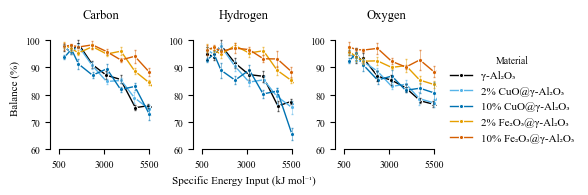

In [69]:
# Create the figure
fig = plt.figure(figsize=(15/2.54, 5/2.54), )

# Create the gridspec
gs = gridspec.GridSpec(1, 3, figure=fig)

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# Plot on first subplot
sns.lineplot(
	data=df_balance,
	x='sei_kjmol',
	y='balance_c',
	hue='material_name',
	palette=cb_colors,
	ax=ax1,
	legend=False,
	marker='o',
	markersize=3,
	linewidth=1
)

# Plot on second subplot
sns.lineplot(
	data=df_balance,
	x='sei_kjmol',
	y='balance_h',
	hue='material_name',
	palette=cb_colors,
	ax=ax2,
	legend=False,
	marker='o',
	markersize=3,
	linewidth=1
)

# Plot on third subplot
sns.lineplot(
	data=df_balance,
	x='sei_kjmol',
	y='balance_o',
	hue='material_name',
	palette=cb_colors,
	ax=ax3,
	legend='auto',
	marker='o',
	markersize=3,
	linewidth=1
)

#place legend outside top right corner of plot
ax3.legend(
	bbox_to_anchor=(1.03, 0.85),
	loc='upper left',
	frameon=False,
	fontsize=8,
	title='Material'
)

# Iterate over the axes to add error bars
# Iterate over the axes and materials to add error bars
for ax, balance in zip(fig.axes, ['balance_c', 'balance_h', 'balance_o']):
	for material_name in df_balance['material_name'].unique():
		subset = df_balance[(df_balance['material_name'] == material_name)]
		ax.errorbar(
			subset['sei_kjmol'], 
			subset[balance], 
			yerr=subset[balance+'_sd'] * t_quantile, 
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5, 
			capsize=1,
			alpha=0.6
		)
		
# Set titles
ax1.set_title('Carbon', fontsize=9)
ax2.set_title('Hydrogen', fontsize=9)
ax3.set_title('Oxygen', fontsize=9)

# Set y label
ax1.set_ylabel('Balance (%)', fontsize=8)
ax2.set_ylabel('')
ax3.set_ylabel('')

# Set x label
ax1.set_xlabel('')
ax2.set_xlabel('Specific Energy Input (kJ mol⁻¹)', fontsize=8)
ax3.set_xlabel('')

# Set y limits and ticks
ax1.set_ylim(60, 105)
ax1.spines['left'].set_bounds(60, 100)
ax1.set_yticks(ticks=[60, 70, 80, 90, 100])

ax2.set_ylim(60, 105)
ax2.spines['left'].set_bounds(60, 100)
ax2.set_yticks(ticks=[60, 70, 80, 90, 100])

ax3.set_ylim(60, 105)
ax3.spines['left'].set_bounds(60, 100)
ax3.set_yticks(ticks=[60, 70, 80, 90, 100])

# Set x limits and ticks
ax1.spines['bottom'].set_bounds(500, 5500)
ax2.spines['bottom'].set_bounds(500, 5500)
ax3.spines['bottom'].set_bounds(500, 5500)
ax1.set_xlim(0, 5650)
ax2.set_xlim(0, 5650)
ax3.set_xlim(0, 5650)
ax1.set_xticks(ticks=[500, 3000, 5500])
ax2.set_xticks(ticks=[500, 3000, 5500])
ax3.set_xticks(ticks=[500, 3000, 5500])

sns.despine(ax=ax1, left=False, bottom=False)
sns.despine(ax=ax2, left=False, bottom=False)
sns.despine(ax=ax3, left=False, bottom=False)

plt.tight_layout()
plt.savefig(
	r'C:\Users\Sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_balance_vs_sei.pdf'
)
plt.show()

Step 4: selectivity vs SEI

In [70]:
# Prepare the data for the selectivity plotting
# Select specific columns
# Multiply the values in 'selec' and 'selec_sd' by 100
df_selectivity = df[
	[
		'material_name',
		'compound',
		'residence_time_s',
		'sei_kjmol',
		'sei_kjmol_sd',
		'selec_c',
		'selec_c_sd',
		'selec_h',
		'selec_h_sd',
		'selec_o',
		'selec_o_sd'
	]
].drop_duplicates(
).assign(
	selec_c=lambda x: x['selec_c'] * 100,
	selec_c_sd=lambda x: x['selec_c_sd'] * 100,
	selec_h=lambda x: x['selec_h'] * 100,
	selec_h_sd=lambda x: x['selec_h_sd'] * 100,
	selec_o=lambda x: x['selec_o'] * 100,
	selec_o_sd=lambda x: x['selec_o_sd'] * 100
).copy()

Step 4.1: C-selectivity vs SEI

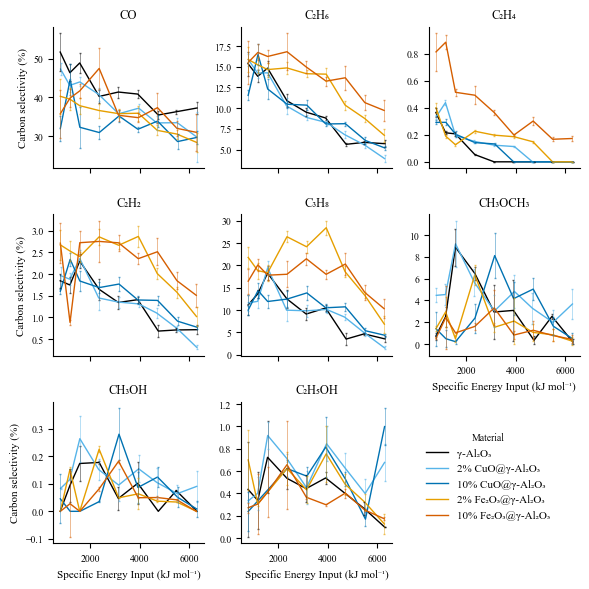

In [71]:
# Carbon selectivity in function of SEI
g = sns.relplot(
	data=df_selectivity,
	x='sei_kjmol',
	y='selec_c',
	hue='material_name',
	palette=cb_colors,
	col='compound',
	col_order=[
		'CO', 'C₂H₆', 'C₂H₄', 'C₂H₂',
		'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'
	],
	kind='line',
	linewidth=1,
	height=5/2.54,
	aspect=1,
	legend=True,
	facet_kws={'sharey': False, 'legend_out': False},
	col_wrap=3
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['CO', 'C₂H₆', 'C₂H₄', 'C₂H₂','C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_selectivity['material_name'].unique():
		subset = df_selectivity[
			(df_selectivity['compound'] == compound) &
			(df_selectivity['material_name'] == material_name)
		]
		ax.errorbar(
			subset['sei_kjmol'],
			subset['selec_c'],
			yerr=subset['selec_c_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

sns.move_legend(
	g,
	loc='lower right',
	title='Material',
	bbox_to_anchor=(0.95, 0.10),
	frameon=False,
	fontsize=8
)

g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('Specific Energy Input (kJ mol⁻¹)', size=8)
g.set_ylabels('Carbon selectivity (%)', size=8)

plt.tight_layout()
plt.savefig(
	r'C:\Users\Sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_selec_c_vs_sei.pdf'
)
plt.show()

Step 4.2: H-selectivity vs SEI

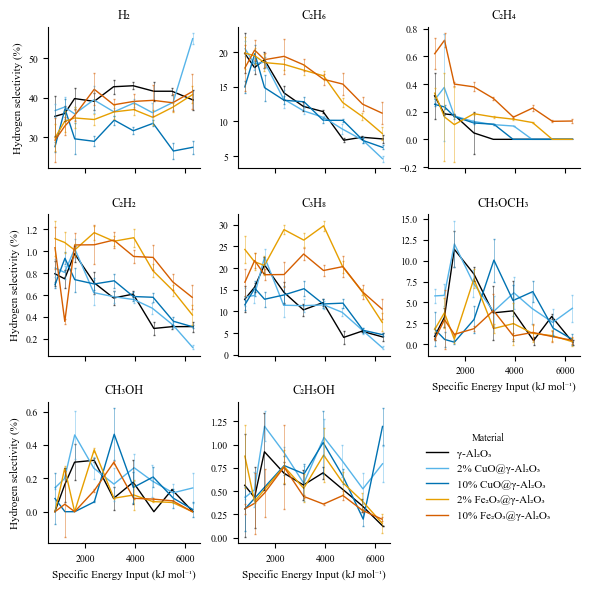

In [72]:
# Hydrogen selectivity in function of SEI
g = sns.relplot(
	data=df_selectivity,
	x='sei_kjmol',
	y='selec_h',
	hue='material_name',
	palette=cb_colors,
	col='compound',
	col_order=[
		'H₂', 'C₂H₆', 'C₂H₄', 'C₂H₂',
		'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'
	],
	kind='line',
	linewidth=1,
	height=5/2.54,
	aspect=1,
	legend=True,
	facet_kws={'sharey': False, 'legend_out': False},
	col_wrap=3
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['H₂', 'C₂H₆', 'C₂H₄', 'C₂H₂', 'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_selectivity['material_name'].unique():
		subset = df_selectivity[
			(df_selectivity['compound'] == compound) &
			(df_selectivity['material_name'] == material_name)
		]
		ax.errorbar(
			subset['sei_kjmol'],
			subset['selec_h'],
			yerr=subset['selec_h_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)


sns.move_legend(
	g,
	loc='lower right',
	title='Material',
	bbox_to_anchor=(0.95, 0.10),
	frameon=False,
	fontsize=8
)

g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('Specific Energy Input (kJ mol⁻¹)', size=8)
g.set_ylabels('Hydrogen selectivity (%)', size=8)

plt.tight_layout()
plt.savefig(
	r'C:\Users\Sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_selec_h_vs_sei.pdf'
)
plt.show()

Step 4.3: O-selectivity vs SEI

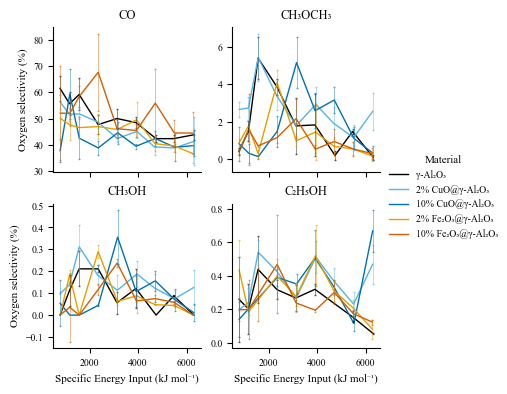

In [73]:
# Oxygen selectivity in function of SEI
g = sns.relplot(
	data=df_selectivity,
	x='sei_kjmol',
	y='selec_o',
	hue='material_name',
	palette=cb_colors,
	col='compound',
	col_order=['CO', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'],
	kind='line',
	linewidth=1,
	height=5/2.54,
	aspect=1,
	legend=True,
	facet_kws={'sharey': False, 'legend_out': True},
	col_wrap=2
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['CO', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_selectivity['material_name'].unique():
		subset = df_selectivity[
			(df_selectivity['compound'] == compound) &
			(df_selectivity['material_name'] == material_name)
		]
		ax.errorbar(
			subset['sei_kjmol'],
			subset['selec_o'],
			yerr=subset['selec_o_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

g.legend.set_title('Material', prop={'size': 8})
g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('Specific Energy Input (kJ mol⁻¹)', size=8)
g.set_ylabels('Oxygen selectivity (%)', size=8)

plt.savefig(
	r'C:\Users\Sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_selec_o_vs_sei.pdf'
)
plt.show()

Step 5: yield vs SEI

In [85]:
# Prepare the data for the yield plotting
# Select specific columns
# Multiply the values in 'yield' and 'yield_sd' by 100
df_yield = df[
	[
		'material_name',
		'compound',
		'residence_time_s',
        'sei_ideal_kjmol',
		'sei_kjmol',
		'sei_kjmol_sd',
		'yield_c',
		'yield_c_sd',
		'yield_h',
		'yield_h_sd',
		'yield_o',
		'yield_o_sd'
	]
].drop_duplicates(
).assign(
	yield_c=lambda x: x['yield_c'] * 100,
	yield_c_sd=lambda x: x['yield_c_sd'] * 100,
	yield_h=lambda x: x['yield_h'] * 100,
	yield_h_sd=lambda x: x['yield_h_sd'] * 100,
	yield_o=lambda x: x['yield_o'] * 100,
	yield_o_sd=lambda x: x['yield_o_sd'] * 100
).copy()

Step 5.1: C-yield vs SEI

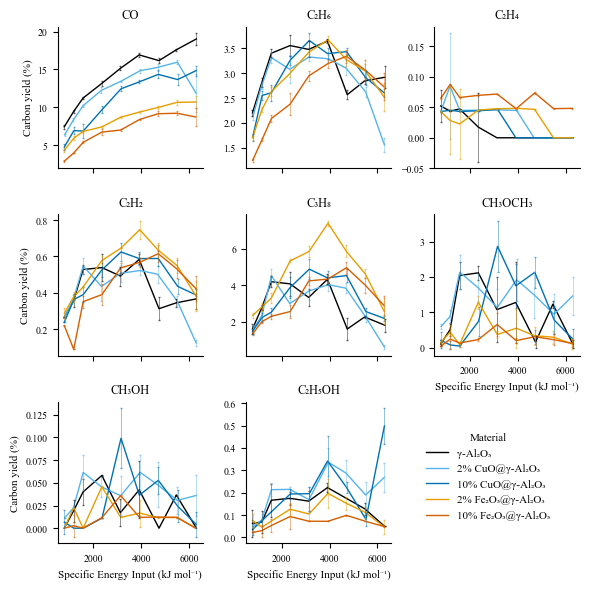

In [75]:
# Carbon yield in function of SEI
g = sns.relplot(
	data=df_yield,
	x='sei_kjmol',
	y='yield_c',
	hue='material_name',
	palette=cb_colors,
	col='compound',
	col_order=[
		'CO', 'C₂H₆', 'C₂H₄', 'C₂H₂',
		'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'
	],
	kind='line',
	linewidth=1,
	height=5/2.54,
	aspect=1,
	legend=True,
	facet_kws={'sharey': False,
			   'legend_out': False},
	col_wrap=3
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['CO', 'C₂H₆', 'C₂H₄', 'C₂H₂', 'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_yield['material_name'].unique():
		subset = df_yield[
			(df_yield['compound'] == compound) &
			(df_yield['material_name'] == material_name)
		]
		ax.errorbar(
			subset['sei_kjmol'],
			subset['yield_c'],
			yerr=subset['yield_c_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

g.legend.set_title('Material', prop={'size': 8})
sns.move_legend(
	g,
	loc='lower right',
	bbox_to_anchor=(0.95, 0.10),
	frameon=False,
	fontsize=8
)

g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('Specific Energy Input (kJ mol⁻¹)', size=8)
g.set_ylabels('Carbon yield (%)', size=8)

plt.tight_layout()
plt.savefig(
	r'C:\Users\Sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_yield_c_vs_sei.pdf'
)
plt.show()

Step 5.2: H-yield vs SEI

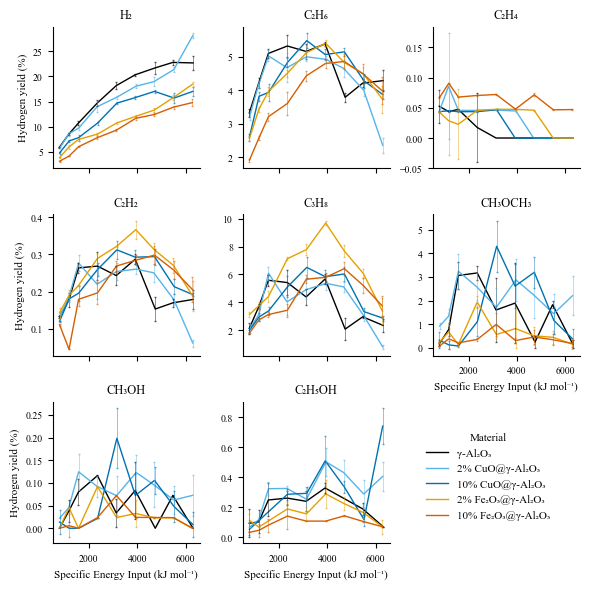

In [76]:
# Hydrogen yield in function of SEI
g = sns.relplot(
	data=df_yield,
	x='sei_kjmol',
	y='yield_h',
	hue='material_name',
	palette=cb_colors,
	col='compound',
	col_order=[
		'H₂', 'C₂H₆', 'C₂H₄', 'C₂H₂',
		'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'
	],
	kind='line',
	linewidth=1,
	height=5/2.54,
	aspect=1,
	legend=True,
	facet_kws={'sharey': False,
			   'legend_out': False},
	col_wrap=3
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['H₂', 'C₂H₆', 'C₂H₄', 'C₂H₂', 'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_yield['material_name'].unique():
		subset = df_yield[
			(df_yield['compound'] == compound) &
			(df_yield['material_name'] == material_name)
		]
		ax.errorbar(
			subset['sei_kjmol'],
			subset['yield_h'],
			yerr=subset['yield_h_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

g.legend.set_title('Material', prop={'size': 8})
sns.move_legend(
	obj=g,
	loc='lower right',
	bbox_to_anchor=(0.95, 0.10),
	frameon=False,
	fontsize=8
)

g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('Specific Energy Input (kJ mol⁻¹)', size=8)
g.set_ylabels('Hydrogen yield (%)', size=8)

plt.tight_layout()
plt.savefig(
	r'C:\Users\Sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_yield_h_vs_sei.pdf'
)
plt.show()

Step 5.3: O-yield vs SEI

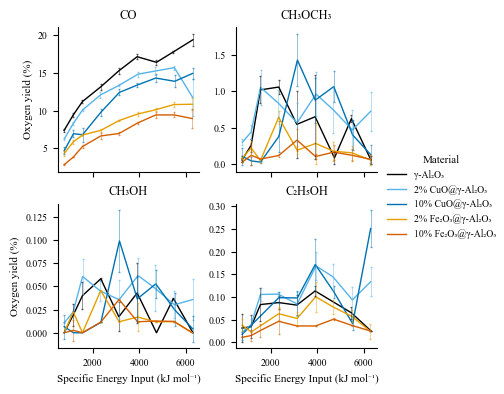

In [77]:
# Oxygen yield in function of SEI
g = sns.relplot(
	data=df_yield,
	x='sei_kjmol',
	y='yield_o',
	hue='material_name',
	palette=cb_colors,
	col='compound',
	col_order=['CO', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'],
	kind='line',
	linewidth=1,
	height=5/2.54,
	aspect=1,
	legend=True,
	facet_kws={'sharey': False,
			   'legend_out': True},
	col_wrap=2
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['CO', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_yield['material_name'].unique():
		subset = df_yield[
			(df_yield['compound'] == compound) &
			(df_yield['material_name'] == material_name)
		]
		ax.errorbar(
			subset['sei_kjmol'],
			subset['yield_o'],
			yerr=subset['yield_o_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

g.legend.set_title('Material', prop={'size': 8})
g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('Specific Energy Input (kJ mol⁻¹)', size=8)
g.set_ylabels('Oxygen yield (%)', size=8)

plt.savefig(
	r'C:\Users\Sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_yield_o_vs_sei.pdf',
	bbox_inches='tight'
)
plt.show()

Step 6: yield vs conv

In [80]:
data_conv.head()

,material_name,compound,residence_time_s,fit_pred,conv_eq,conv_eq_sd,conv_eq_rsd,k,k_sd,k_rsd,conv,conv_sd,conc_avg_corr,conc_avg_corr_sd,conc_init,sei_ideal_kjmol,conv_fit,original_order
0,10% CuO@γ-Al₂O₃,CH₄,0.0,0.028938,0.723459,0.010702,0.014793,0.02104,0.000615,0.029224,NaN,NaN,NaN,NaN,NaN,0,2.893836,0
1,10% CuO@γ-Al₂O₃,CH₄,0.5,0.036206,0.723459,0.010702,0.014793,0.02104,0.000615,0.029224,NaN,NaN,NaN,NaN,NaN,40,3.620648,1
2,10% CuO@γ-Al₂O₃,CH₄,1.0,0.043399,0.723459,0.010702,0.014793,0.02104,0.000615,0.029224,NaN,NaN,NaN,NaN,NaN,80,4.339853,2
3,10% CuO@γ-Al₂O₃,CH₄,1.5,0.050515,0.723459,0.010702,0.014793,0.02104,0.000615,0.029224,NaN,NaN,NaN,NaN,NaN,120,5.051533,3
4,10% CuO@γ-Al₂O₃,CH₄,2.0,0.057558,0.723459,0.010702,0.014793,0.02104,0.000615,0.029224,NaN,NaN,NaN,NaN,NaN,160,5.755764,4


In [82]:
df_conv = data_conv.dropna(ignore_index=True).copy()
df_conv.head()

,material_name,compound,residence_time_s,fit_pred,conv_eq,conv_eq_sd,conv_eq_rsd,k,k_sd,k_rsd,conv,conv_sd,conc_avg_corr,conc_avg_corr_sd,conc_init,sei_ideal_kjmol,conv_fit,original_order
0,10% CuO@γ-Al₂O₃,CH₄,10.0,0.160718,0.723459,0.010702,0.014793,0.02104,0.000615,0.029224,17.296475,0.276935,0.418390,0.001339,0.5,780,16.071760,20
1,10% CuO@γ-Al₂O₃,CH₄,15.0,0.216911,0.723459,0.010702,0.014793,0.02104,0.000615,0.029224,19.293155,0.383644,0.392950,0.000735,0.5,1180,21.691087,30
2,10% CuO@γ-Al₂O₃,CH₄,20.0,0.267493,0.723459,0.010702,0.014793,0.02104,0.000615,0.029224,26.443452,1.009609,0.372307,0.003252,0.5,1570,26.749288,40
3,10% CuO@γ-Al₂O₃,CH₄,30.0,0.354008,0.723459,0.010702,0.014793,0.02104,0.000615,0.029224,37.032726,0.404159,0.333658,0.001415,0.5,2350,35.400848,60
4,10% CuO@γ-Al₂O₃,CH₄,40.0,0.424108,0.723459,0.010702,0.014793,0.02104,0.000615,0.029224,42.744961,0.384875,0.283669,0.001032,0.5,3140,42.410850,80


In [86]:
# drop all rows with NaN values
df_conv = data_conv.dropna()

# Step 1: Add an auxiliary column to capture the original row order
df_conv['original_order'] = range(len(df_conv))

# Step 2: Perform the pivot operation
df_conv_wide = df_conv.pivot_table(
	index=['material_name', 'residence_time_s', 'sei_ideal_kjmol', 'original_order'],
	columns='compound',
	values=['conv', 'conv_sd'],
	aggfunc='first'
).reset_index(
).copy()

# Step 3: Sort by the auxiliary column
df_conv_wide.sort_values('original_order', inplace=True)

# Step 4: Flatten the MultiIndex that pivot_table creates
df_conv_wide.columns = ['_'.join(col).rstrip('_') if col[1] else col[0] for col in df_conv_wide.columns.values]

# Step 5: Remove the auxiliary column
df_conv_wide.drop('original_order', axis=1, inplace=True)

# Step 6: Merge df_conv_wide with df_yield
df_conv_yield = df_conv_wide.merge(
	df_yield,
	how='inner',
	on=['material_name', 'residence_time_s', 'sei_ideal_kjmol']
)

C:\Users\Sande\AppData\Local\Temp\ipykernel_13852\1659895334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conv['original_order'] = range(len(df_conv))


Step 6.1: C-yield vs total conv

c:\source\uantwerpen\ladca_incat_envecon_paper\.venv\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\source\uantwerpen\ladca_incat_envecon_paper\.venv\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\source\uantwerpen\ladca_incat_envecon_paper\.venv\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\source\uantwerpen\ladca_incat_envecon_paper\.venv\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\source\uantwerpen\ladca_incat_envecon_paper\.venv\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\source\

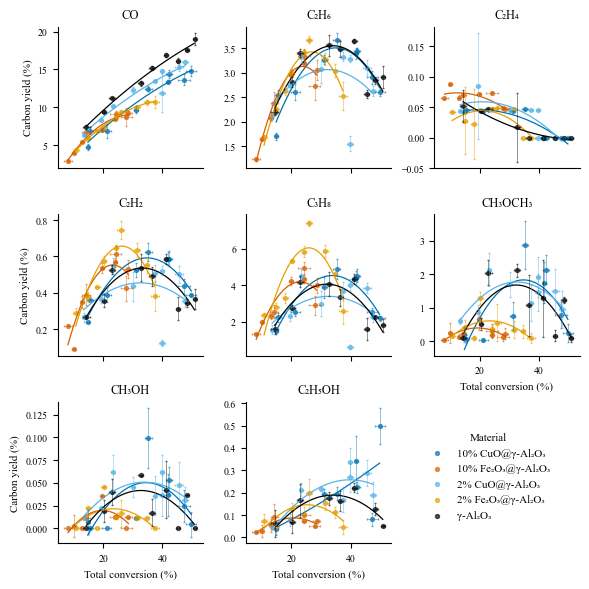

In [87]:
g = sns.lmplot(
	data=df_conv_yield,
	x='conv_Total',
	y='yield_c',
	hue='material_name',
	palette=cb_colors,
	col='compound',
	col_order=['CO', 'C₂H₆', 'C₂H₄', 'C₂H₂', 'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'],
	height=5/2.54,
	aspect=1,
	order=2,
	ci=False,
	legend=True,
	scatter_kws={'s': 8, 'alpha': alpha},
	line_kws={'lw': 0.9},
	facet_kws={'sharey': False,
			   'legend_out': False},
	col_wrap=3
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['CO', 'C₂H₆', 'C₂H₄', 'C₂H₂', 'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_conv_yield['material_name'].unique():
		subset = df_conv_yield[
			(df_conv_yield['compound'] == compound) &
			(df_conv_yield['material_name'] == material_name)
		]
		ax.errorbar(
			subset['conv_Total'],
			subset['yield_c'],
			yerr=subset['yield_c_sd'] * t_quantile,
			xerr=subset['conv_sd_Total']* t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

g.legend.set_title('Material', prop={'size': 8})
sns.move_legend(
	g,
	loc='lower right',
	bbox_to_anchor=(0.95, 0.10),
	frameon=False,
	fontsize=8
)

g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('Total conversion (%)', size=8)
g.set_ylabels('Carbon yield (%)', size=8)

plt.tight_layout()
plt.savefig(
	r'C:\Users\Sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_yield_c_vs_conv_total.pdf'
)
plt.show()

Step 6.2: H-yield vs CH₄ conv

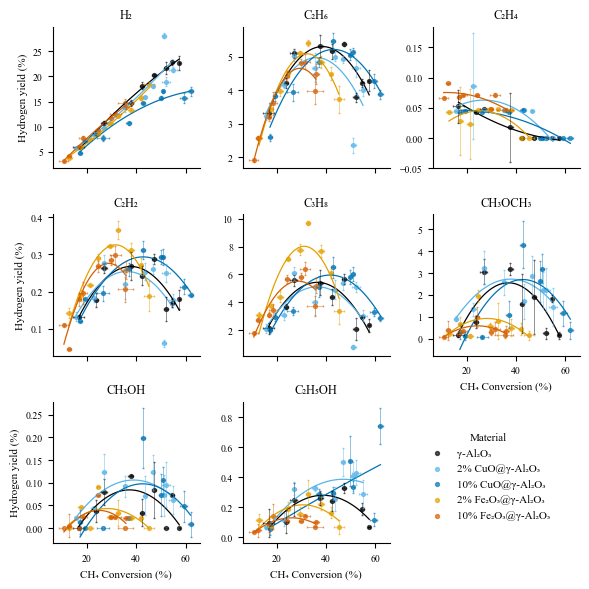

In [20]:
# Hydrogen yield in function of CH₄ conversion
g = sns.lmplot(
	data=df_conv_yield,
	x='conv_CH₄',
	y='yield_h',
	hue='material_name',
	palette=cb_colors,
	col='compound',
	col_order=['H₂', 'C₂H₆', 'C₂H₄', 'C₂H₂', 'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'],
	height=5/2.54,
	aspect=1,
	order=2,
	ci=False,
	legend=True,
	scatter_kws={'s': 8, 'alpha': alpha},
	line_kws={'lw': 0.9},
	facet_kws={'sharey': False,
			   'legend_out': False},
	col_wrap=3
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['H₂', 'C₂H₆', 'C₂H₄', 'C₂H₂', 'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_conv_yield['material_name'].unique():
		subset = df_conv_yield[
			(df_conv_yield['compound'] == compound) &
			(df_conv_yield['material_name'] == material_name)
		]
		ax.errorbar(
			subset['conv_CH₄'],
			subset['yield_h'],
			yerr=subset['yield_h_sd'] * t_quantile,
			xerr=subset['conv_sd_CH₄']* t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

g.legend.set_title('Material', prop={'size': 8})
sns.move_legend(
	g,
	loc='lower right',
	title='Material',
	bbox_to_anchor=(0.95, 0.10),
	frameon=False,
	fontsize=8
)

g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('CH₄ Conversion (%)', size=8)
g.set_ylabels('Hydrogen yield (%)', size=8)

plt.tight_layout()
plt.savefig(
	r'C:\Users\sbossier\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_yield_h_vs_conv_ch4.pdf'
)
plt.show()

Step 6.3: O-yield vs CO₂ conv

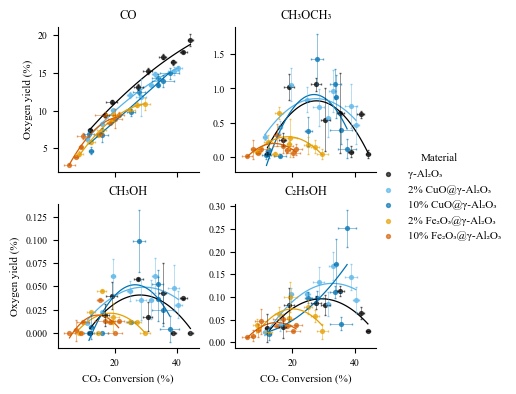

In [21]:
# Oxygen yield in function of CO₂ conversion
g = sns.lmplot(
	data=df_conv_yield,
	x='conv_CO₂',
	y='yield_o',
	hue='material_name',
	palette=cb_colors,
	col='compound',
	col_order=['CO', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'],
	height=5/2.54,
	aspect=1,
	order=2,
	ci=False,
	legend=True,
	scatter_kws={'s': 8, 'alpha': alpha},
	line_kws={'lw': 0.9},
	facet_kws={'sharey': False,
			   'legend_out': True},
	col_wrap=2
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['CO', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_conv_yield['material_name'].unique():
		subset = df_conv_yield[
			(df_conv_yield['compound'] == compound) &
			(df_conv_yield['material_name'] == material_name)
		]
		ax.errorbar(
			subset['conv_CO₂'],
			subset['yield_o'],
			yerr=subset['yield_o_sd'] * t_quantile,
			xerr=subset['conv_sd_CO₂']* t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

g.legend.set_title('Material', prop={'size': 8})
sns.move_legend(
	g,
	loc='right',
	bbox_to_anchor=(1.025, 0.5),
	frameon=False,
	fontsize=8
)

g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('CO₂ Conversion (%)', size=8)
g.set_ylabels('Oxygen yield (%)', size=8)

plt.savefig(
	r'C:\Users\sbossier\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_yield_o_vs_conv_co2.pdf',
	bbox_inches='tight'
)
plt.show()

Step 7: H₂/CO yield ratio

In [22]:
df_ratio = df[
	[
		'material_name',
		'compound',
		'residence_time_s',
		'conv',
		'sei_kjmol',
		'sei_kjmol_sd',
		'yield_ratio',
		'yield_ratio_sd'
	]
].query(
	'compound in ["Total"]'
).assign(
	conv=lambda x: x['conv'] * 100,    
).drop_duplicates(
).copy()

Step 7.1: H₂/CO yield ratio vs SEI

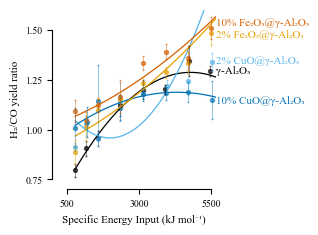

In [23]:
g = sns.lmplot(
	data=df_ratio,
	x='sei_kjmol',
	y='yield_ratio',
	hue='material_name',
	palette=cb_colors,
	height=6/2.54,
	aspect=1.35,
	order=2,
	ci=False,
	legend=False,
	scatter_kws={'s': 8, 'alpha': alpha},
	line_kws={'lw': 0.9}
)

ax = g.axes.flatten()[0]

# Iterate over the axes and materials to add error bars
for material_name in df_ratio['material_name'].unique():
		subset = df_ratio[(df_ratio['material_name'] == material_name)]
		ax.errorbar(
			subset['sei_kjmol'],
			subset['yield_ratio'],
			yerr=subset['yield_ratio_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

g.set_xlabels('Specific Energy Input (kJ mol⁻¹)', fontsize=8)
g.set_ylabels('H₂/CO yield ratio', fontsize=8)

# Define the label points manually
label_points = {
	'γ-Al₂O₃': (5600, 1.28),
	'2% CuO@γ-Al₂O₃': (5600, 1.33),
	'2% Fe₂O₃@γ-Al₂O₃': (5600, 1.46),
	'10% CuO@γ-Al₂O₃': (5600, 1.13),
	'10% Fe₂O₃@γ-Al₂O₃':  (5600, 1.52)
}

# Loop through each item in label_points
# and add a text label with an offset
for material_name, (x, y) in label_points.items():
	ax.annotate(
		text=material_name,
		xy=(x, y),
		xytext=(1,0),
		textcoords='offset points',
		fontsize=8,
		color=cb_colors[material_name]
	)

ax.set_xlim(0, 5650)
ax.spines['bottom'].set_bounds(500, 5500)
ax.set_xticks(ticks=[500, 3000, 5500])

ax.set_ylim(0.7, 1.6)
ax.spines['left'].set_bounds(0.75, 1.5)
ax.set_yticks(ticks=[0.75, 1.0, 1.25, 1.5])

plt.tight_layout()
plt.savefig(
	r'C:\Users\sbossier\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_ratio_vs_sei.pdf'
)
plt.show()

Step 7.2: H₂/CO yield ratio vs total conv

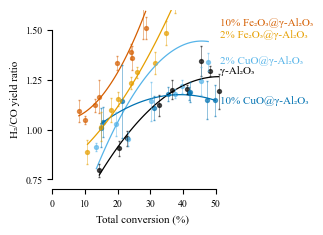

In [24]:
g = sns.lmplot(
	data=df_ratio,
	x='conv',
	y='yield_ratio',
	hue='material_name',
	palette=cb_colors,
	height=6/2.54,
	aspect=1.35,
	order=2,
	ci=False,
	legend=False,
	scatter_kws={'s': 8, 'alpha': alpha},
	line_kws={'lw': 0.9}
)

ax = g.axes.flatten()[0]

# Iterate over the axes and materials to add error bars
for material_name in df_ratio['material_name'].unique():
		subset = df_ratio[(df_ratio['material_name'] == material_name)]
		ax.errorbar(
			subset['conv'],
			subset['yield_ratio'],
			yerr=subset['yield_ratio_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

g.set_xlabels('Total conversion (%)', fontsize=8)
g.set_ylabels('H₂/CO yield ratio', fontsize=8)

# Define the label points manually
label_points = {
	'γ-Al₂O₃': (51, 1.28),
	'2% CuO@γ-Al₂O₃': (51, 1.33),
	'2% Fe₂O₃@γ-Al₂O₃': (51, 1.46),
	'10% CuO@γ-Al₂O₃': (51, 1.13),
	'10% Fe₂O₃@γ-Al₂O₃':  (51, 1.52)
}

# Loop through each item in label_points
# and add a text label with an offset
for material_name, (x, y) in label_points.items():
	ax.annotate(
		text=material_name,
		xy=(x, y),
		xytext=(1,0),
		textcoords='offset points',
		fontsize=8,
		color=cb_colors[material_name]
	)

ax.set_xlim(0, 55)
ax.spines['bottom'].set_bounds(0, 50)
ax.set_xticks(ticks=[0, 10, 20, 30, 40, 50])

ax.set_ylim(0.7, 1.6)
ax.spines['left'].set_bounds(0.75, 1.5)
ax.set_yticks(ticks=[0.75, 1.0, 1.25, 1.5])

plt.tight_layout()
plt.savefig(
	r'C:\Users\sbossier\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_ratio_vs_conv_total.pdf'
)
plt.show()

Step 7.3: H₂/CO yield ratio vs CH₄/CO₂ conv ratio

In [25]:
df_conv_yield_ratio = df[
	[
		'material_name',
		'compound',
		'residence_time_s',
		'conv',
        'conv_sd',
		'sei_kjmol',
		'sei_kjmol_sd',
		'yield_ratio',
		'yield_ratio_sd'
	]
].query(
	'compound in ["CO₂", "CH₄"]'
).pivot(
	index=['material_name', 'residence_time_s', 'sei_kjmol', 'sei_kjmol_sd', 'yield_ratio', 'yield_ratio_sd'],
	columns='compound',
	values=['conv', 'conv_sd']
).assign(
	conv_ratio=lambda x: x[('conv', 'CH₄')] / x[('conv', 'CO₂')],
    conv_ratio_sd=lambda x: x['conv_ratio'] * (
        (x[('conv_sd', 'CH₄')] / x[('conv', 'CH₄')]) ** 2 +
        (x[('conv_sd', 'CO₂')] / x[('conv', 'CO₂')]) ** 2
    ) ** 0.5
).drop_duplicates(
).reset_index(
).drop(
    labels=[('conv', 'CH₄'), ('conv', 'CO₂'), ('conv_sd', 'CH₄'), ('conv_sd', 'CO₂')],
    axis=1
).copy()

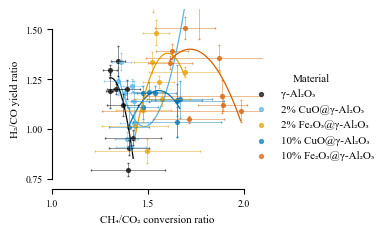

In [26]:
g = sns.lmplot(
	data=df_conv_yield_ratio,
	x='conv_ratio',
	y='yield_ratio',
	hue='material_name',
	hue_order=material_order,
	palette=cb_colors,
	height=6/2.54,
	aspect=1.2,
	order=2,
	ci=False,
	legend=True,
	scatter_kws={'s': 8, 'alpha': alpha},
	line_kws={'lw': 0.9}
)

ax = g.axes.flatten()[0]

# Iterate over the axes and materials to add error bars
for material_name in df_conv_yield_ratio['material_name'].unique():
		subset = df_conv_yield_ratio[(df_conv_yield_ratio['material_name'] == material_name)]
		ax.errorbar(
			subset['conv_ratio'],
			subset['yield_ratio'],
			yerr=subset['yield_ratio_sd'] * t_quantile,
			xerr=subset['conv_ratio_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

g.set_xlabels('CH₄/CO₂ conversion ratio', fontsize=8)
g.set_ylabels('H₂/CO yield ratio', fontsize=8)

ax.set_xlim(1, 2.1)
ax.spines['bottom'].set_bounds(1, 2)
ax.set_xticks(ticks=[1, 1.5, 2])

ax.set_ylim(0.7, 1.6)
ax.spines['left'].set_bounds(0.75, 1.5)
ax.set_yticks(ticks=[0.75, 1.0, 1.25, 1.5])

g.legend.set_title('Material', prop={'size': 8})
sns.move_legend(
	g,
	loc='right',
	bbox_to_anchor=(1.0, 0.5),
	frameon=False,
	fontsize=8
)

plt.savefig(
	r'C:\Users\sbossier\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_yield_ratio_vs_conv_ratio.pdf',
	bbox_inches='tight'
)
plt.show()

Step 8: Carbon vs CH₄/CO₂ conv ratio

In [27]:
df_conv_ratio_temp = df[
    [
        'material_name',
        'compound',
        'residence_time_s',
        'conv',
        'conv_sd'
    ]
].query(
    'compound in ["CO₂", "CH₄"]'
).pivot_table(
    index=['material_name', 'residence_time_s'],
    columns='compound',
    values=['conv', 'conv_sd']
).assign(
    conv_ratio=lambda x: x[('conv', 'CH₄')] / x[('conv', 'CO₂')],
    conv_ratio_sd=lambda x: x['conv_ratio'] * (
        (x[('conv_sd', 'CH₄')] / x[('conv', 'CH₄')]) ** 2 +
        (x[('conv_sd', 'CO₂')] / x[('conv', 'CO₂')]) ** 2
    ) ** 0.5
).reset_index()

# Flatten the MultiIndex columns without adding trailing underscores
df_conv_ratio_temp.columns = [
    '{}_{}'.format(col[0], col[1]) if isinstance(col, tuple) and col[1] else col[0]
    for col in df_conv_ratio_temp.columns.values
]

# Drop the now-unnecessary columns
df_conv_ratio_temp = df_conv_ratio_temp.drop(
    columns=['conv_CH₄', 'conv_CO₂', 'conv_sd_CH₄', 'conv_sd_CO₂']
).copy()

# Optional: Reset the columns' name attribute
df_conv_ratio_temp.columns.name = None

In [28]:
df_selec_temp = df[
	[
		'material_name',
		'compound',
		'residence_time_s',
		'sei_kjmol',
		'sei_kjmol_sd',
		'selec_c',
		'selec_c_sd',
		'yield_c',
		'yield_c_sd'
	]
].query(
	'compound not in ["Total", "CO₂", "CH₄"]'
).assign(
	selec_c=lambda x: x['selec_c'] * 100,
	selec_c_sd=lambda x: x['selec_c_sd'] * 100,
	yield_c=lambda x: x['yield_c'] * 100,
	yield_c_sd=lambda x: x['yield_c_sd'] * 100 
).drop_duplicates(
).reset_index(
	drop=True
).copy()

In [29]:
# merge df_conv_ratio_temp and df_selec_temp
df_conv_ratio_selec = df_conv_ratio_temp.merge(
	df_selec_temp,
	how='inner',
	on=['material_name', 'residence_time_s']
)

Step 8.1: C-selectivity vs CH₄/CO₂ conv ratio

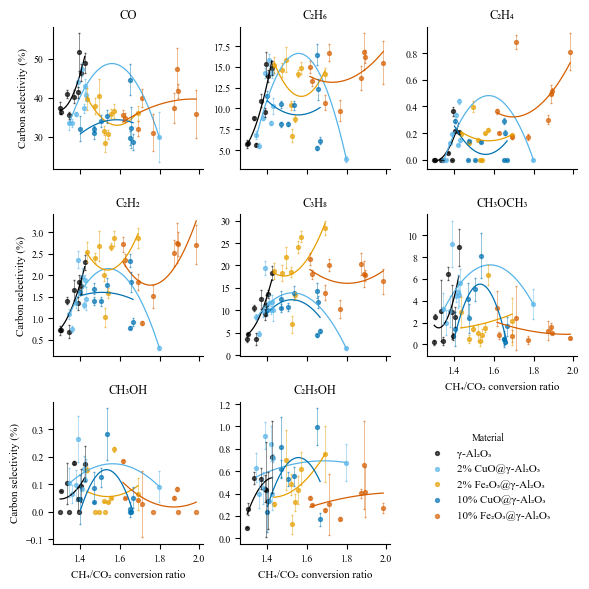

In [30]:
# Carbon selectivity in function of SEI
g = sns.lmplot(
	data=df_conv_ratio_selec,
	x='conv_ratio',
	y='selec_c',
	hue='material_name',
	palette=cb_colors,
	hue_order=material_order,
	col='compound',
	col_order=[
		'CO', 'C₂H₆', 'C₂H₄', 'C₂H₂',
		'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'
	],
	height=5/2.54,
	aspect=1,
	order=2,
	ci=False,
	legend=True,
	scatter_kws={'s': 8, 'alpha': alpha},
	line_kws={'lw': 0.9},
	facet_kws={'sharey': False, 'legend_out': False},
	col_wrap=3
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['CO', 'C₂H₆', 'C₂H₄', 'C₂H₂', 'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_conv_ratio_selec['material_name'].unique():
		subset = df_conv_ratio_selec[
			(df_conv_ratio_selec['compound'] == compound) &
			(df_conv_ratio_selec['material_name'] == material_name)
		]
		ax.errorbar(
			subset['conv_ratio'],
			subset['selec_c'],
			yerr=subset['selec_c_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

sns.move_legend(
   g,
   loc='lower right',
   title='Material',
   bbox_to_anchor=(0.95, 0.10),
   frameon=False,
   fontsize=8
)

g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('CH₄/CO₂ conversion ratio', size=8)
g.set_ylabels('Carbon selectivity (%)', size=8)

plt.tight_layout()
plt.savefig(
	r'C:\Users\sbossier\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_selec_c_vs_conv_ratio.pdf'
)
plt.show()

Step 8.2: C-yield vs CH₄/CO₂ conv ratio

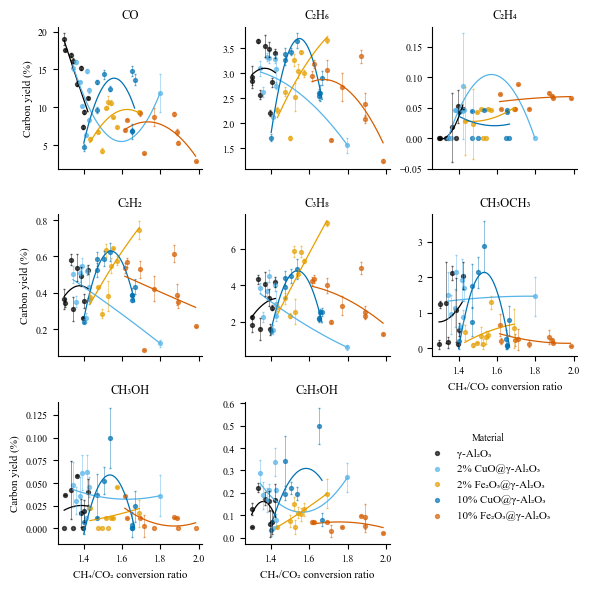

In [31]:
# Carbon selectivity in function of SEI
g = sns.lmplot(
	data=df_conv_ratio_selec,
	x='conv_ratio',
	y='yield_c',
	hue='material_name',
	hue_order=material_order,
	palette=cb_colors,
	col='compound',
	col_order=[
		'CO', 'C₂H₆', 'C₂H₄', 'C₂H₂',
		'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH'
	],
	height=5/2.54,
	aspect=1,
	order=2,
	ci=False,
	legend=True,
	scatter_kws={'s': 8, 'alpha': alpha},
	line_kws={'lw': 0.9},
	facet_kws={'sharey': False, 'legend_out': False},
	col_wrap=3
)

# Iterate over the axes and materials to add error bars
for ax, compound in zip(g.axes.flatten(), ['CO', 'C₂H₆', 'C₂H₄', 'C₂H₂', 'C₃H₈', 'CH₃OCH₃', 'CH₃OH', 'C₂H₅OH']):
	for material_name in df_conv_ratio_selec['material_name'].unique():
		subset = df_conv_ratio_selec[
			(df_conv_ratio_selec['compound'] == compound) &
			(df_conv_ratio_selec['material_name'] == material_name)
		]
		ax.errorbar(
			subset['conv_ratio'],
			subset['yield_c'],
			yerr=subset['yield_c_sd'] * t_quantile,
			fmt='none',
			ecolor=cb_colors[material_name],
			elinewidth=0.5,
			capsize=1,
			alpha=0.6
		)

sns.move_legend(
	g,
	loc='lower right',
	title='Material',
	bbox_to_anchor=(0.95, 0.10),
	frameon=False,
	fontsize=8
)

g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('CH₄/CO₂ conversion ratio', size=8)
g.set_ylabels('Carbon yield (%)', size=8)

plt.tight_layout()
plt.savefig(
	r'C:\Users\sbossier\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_yield_c_vs_conv_ratio.pdf'
)
plt.show()

Step 9: CH4/CO2 conv ratio vs co2, ch4, and total conv

In [32]:
df_conv_temp = df[
	[
		'material_name',
		'compound',
		'residence_time_s',
		'sei_kjmol',
		'sei_kjmol_sd',
        'sei_ideal_kjmol',
		'conv',
		'conv_sd'
	]
].query(
	'compound in ["Total", "CO₂", "CH₄"]'
).assign(
	conv=lambda x: x['conv'] * 100,
	conv_sd=lambda x: x['conv_sd'] * 100
).drop_duplicates(
).reset_index(
	drop=True
).copy()

In [33]:
# merge df_conv_ratio_temp and df_selec_temp
df_conv_ratio_conv = df_conv_ratio_temp.merge(
	df_conv_temp,
	how='inner',
	on=['material_name', 'residence_time_s']
)

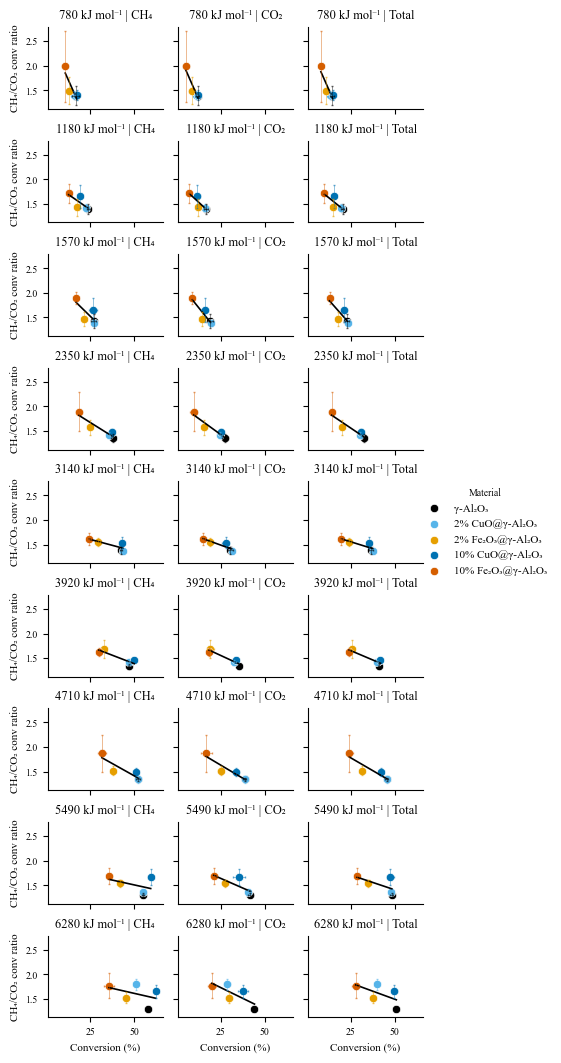

In [34]:
g = sns.FacetGrid(
    data=df_conv_ratio_conv,
    col='compound',
    row='sei_ideal_kjmol',
    hue='material_name',
    hue_order=material_order,
    palette=cb_colors,
    height=3/2.54,
    aspect=1.25
)

g.map(
    sns.scatterplot,
    'conv',
    'conv_ratio',
)

# Iterate over each subplot to apply regplot for each group
for ax, (group_keys, subset) in zip(g.axes.flat, df_conv_ratio_conv.groupby(['compound', 'sei_ideal_kjmol'], sort=False)):
    # Apply regplot to the current subset and axis
    sns.regplot(
        x='conv',
        y='conv_ratio',
        data=subset,
        ax=ax,
        scatter=False,
        color='black',
        ci=None,
        line_kws={'lw': 1.2}
    )

    # Add error bars
    for material_name in subset['material_name'].unique():
        material_subset = subset[subset['material_name'] == material_name]
        ax.errorbar(
            material_subset['conv'],
            material_subset['conv_ratio'],
            xerr=material_subset['conv_sd'] * t_quantile,
            yerr=material_subset['conv_ratio_sd'] * t_quantile,
            fmt='none',
            ecolor=cb_colors[material_name],
            elinewidth=0.5,
            capsize=1,
            alpha=0.6
        )

# Adjust legend, labels, and titles
g.add_legend(title="Material")
sns.move_legend(
	g,
	loc='center right',
	title='Material',
	bbox_to_anchor=(1.02, 0.50),
	frameon=False,
	fontsize=8
)

g.set_titles(col_template="{col_name}", row_template="{row_name} kJ mol⁻¹", size=9)
g.set_axis_labels(
    x_var="Conversion (%)",
    y_var="CH₄/CO₂ conv ratio",
    size=8
)

#plt.tight_layout()
plt.savefig(
	r'C:\Users\sbossier\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_conv_ratio_vs_conv.pdf',
	bbox_inches='tight'
)
plt.show()
plt.clf()
plt.close()

Step 10: CH4/CO2 conv ratio vs SEI

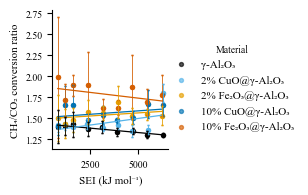

In [35]:
g = sns.lmplot(
	data=df_conv_ratio_conv,
	x='sei_kjmol',
	y='conv_ratio',
	hue='material_name',
	hue_order=material_order,
	palette=cb_colors,
	height=5/2.54,
	aspect=1,
	order=1,
	ci=False,
	legend=True,
	scatter_kws={'s': 8, 'alpha': alpha},
	line_kws={'lw': 0.9},
	facet_kws={'sharey': True, 'legend_out': True}
)

# Iterate over the axes and materials to add error bars
for material_name in df_conv_ratio_conv['material_name'].unique():
	subset = df_conv_ratio_conv[(df_conv_ratio_conv['material_name'] == material_name)]
	g.ax.errorbar(
		subset['sei_kjmol'],
		subset['conv_ratio'],
		yerr=subset['conv_ratio_sd'] * t_quantile,
		fmt='none',
		ecolor=cb_colors[material_name],
		elinewidth=0.5,
		capsize=1,
		alpha=0.6
	)

sns.move_legend(
	g,
	loc='center right',
	title='Material',
	bbox_to_anchor=(1.05, 0.55),
	frameon=False,
	fontsize=8
)

g.set_titles(col_template='{col_name}', size=9)
g.set_xlabels('SEI (kJ mol⁻¹)', size=8)
g.set_ylabels('CH₄/CO₂ conversion ratio', size=8)

#plt.tight_layout()
plt.savefig(
	r'C:\Users\sbossier\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_conv_ratio_vs_sei.pdf',
	bbox_inches='tight'
)
plt.show()